In [1]:
# import pandas library 
import pandas as pd

In [2]:
#Data Collection of file BollywoodMovies.csv
data_1=pd.read_csv('BollywoodMovies.csv')

In [3]:
#Display id and movie title
data_1.head()

,item_id,title
0,1,Albela
1,2,Lagaan: Once Upon a Time in India
2,3,Meri Biwi Ka Jawab Nahin
3,4,Hum Tumhare Hain Sanam
4,5,One 2 Ka 4


In [4]:
#Data Collection of file rating.csv
data_2 = pd.read_csv('rating.csv')

In [5]:
#Display head of data
data_2.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [6]:
#Merging of two datasets(BollywoodMovies.csv and rating.csv)
data_3= pd.merge(data_1, data_2, on='item_id') 
data_3.head()

,item_id,title,user_id,rating
0,1,Albela,308,4
1,1,Albela,287,5
2,1,Albela,148,4
3,1,Albela,280,4
4,1,Albela,66,3


In [7]:
#Display movie title and mean rating
data_3.groupby('title')['rating'].mean().sort_values(ascending=False).head() 

title
Nasha                                 5.0
Lakshmi                               5.0
LSD: Love, Sex Aur Dhokha             5.0
Kismet Love Paisa Dilli               5.0
Hathyar: Face to Face with Reality    4.5
Name: rating, dtype: float64

In [8]:
#Display movie title and count rating
data_3.groupby('title')['rating'].count().sort_values(ascending=False)

title
Yeh Teraa Ghar Yeh Meraa Ghar       584
Murder                              509
Yeh Hai Jalwa                       508
Plan                                507
Phir Milenge                        485
                                   ... 
Darr @ the Mall                       1
7 Khoon Maaf                          1
Hari Puttar: A Comedy of Terrors      1
Kismet Love Paisa Dilli               1
Sorry Bhai!                           1
Name: rating, Length: 1284, dtype: int64

In [9]:
#Display number of rows and columns
data_3.shape

(98391, 4)

In [10]:
#creation of dataframe with 'rating' count values
ratings = pd.DataFrame(data_3.groupby('title')['rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(data_3.groupby('title')['rating'].count()) 
  
ratings.head() 

,rating,num of ratings
title,,
...Yahaan,2.511628,43
02-Oct,3.544118,68
13B: Fear Has a New Address,3.200000,15
16-Dec,3.000000,5
1920,4.000000,10


In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [12]:
sns.set_style('white') 
%matplotlib inline 

<AxesSubplot:>

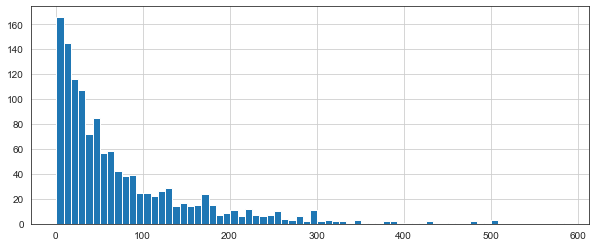

In [13]:
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 70) 

<AxesSubplot:>

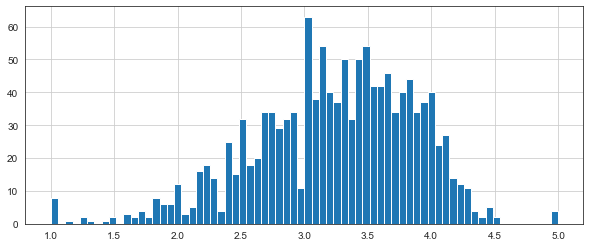

In [14]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
ratings['rating'].hist(bins = 70) 

In [15]:
# Sorting values according to the 'num of rating column' 
moviemat = data_3.pivot_table(index ='user_id', 
              columns ='title', values ='rating') 
  
moviemat.head() 
  
ratings.sort_values('num of ratings', ascending = False).head(10) 

,rating,num of ratings
title,,
Yeh Teraa Ghar Yeh Meraa Ghar,4.359589,584
Murder,3.803536,509
Yeh Hai Jalwa,4.155512,508
Plan,4.007890,507
Phir Milenge,3.156701,485
Hyderabad Blues 2,3.656965,481
Revati,3.441423,478
Albela,3.878319,452
Madhoshi,3.631090,431


In [16]:
# analysing correlation with similar movies 
phir_milenge_user_ratings = moviemat['Phir Milenge'] 
albela_user_ratings = moviemat['Albela'] 
  
phir_milenge_user_ratings.head() 

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Phir Milenge, dtype: float64

In [17]:
# analysing correlation with similar movies 
similar_to_phir_milenge = moviemat.corrwith(phir_milenge_user_ratings) 
similar_to_albela = moviemat.corrwith(albela_user_ratings) 
  
corr_phir_milenge = pd.DataFrame(similar_to_phir_milenge, columns =['Correlation']) 
corr_phir_milenge.dropna(inplace = True) 
  
corr_phir_milenge.head() 

c:\program files (x86)\python37-32\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\program files (x86)\python37-32\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
...Yahaan,-0.114958
02-Oct,0.244880
13B: Fear Has a New Address,0.000000
1920: Evil Returns,0.398787
2 Nights in Soul Valley,-0.505650


In [18]:
# Similar movies like phir_milenge
corr_phir_milenge.sort_values('Correlation', ascending = False).head(10) 
corr_phir_milenge = corr_phir_milenge.join(ratings['num of ratings']) 
  
corr_phir_milenge.head() 
  
corr_phir_milenge[corr_phir_milenge['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
title,,
Phir Milenge,1.000000,485
Chhupa Rustam: A Musical Thriller,0.516968,114
Kya Yehi Pyaar Hai,0.484650,129
Men Will Be Men,0.472681,101
Zindagi Tere Naam,0.469828,137


In [19]:
# Similar movies as of albela 
corr_albela = pd.DataFrame(similar_to_albela, columns =['Correlation']) 
corr_albela.dropna(inplace = True) 
  
corr_albela = corr_albela.join(ratings['num of ratings']) 
corr_albela[corr_albela['num of ratings']>100].sort_values('Correlation', ascending = False).head() 


,Correlation,num of ratings
title,,
Albela,1.000000,452
The Camp,0.549100,104
Men Will Be Men,0.457995,101
Nazar,0.456291,101
Mulaqaat,0.454756,175
